In [1]:

import os 
import numpy as np 
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:

# to keep same random values
np.random.seed(42)

#### ---- SVM Regression ---- ####
from sklearn.svm import LinearSVR

m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

print(X)
print(y)


[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]
 [1.22370579]
 [0.27898772]
 [0.5842893 ]
 [0.73272369]
 [0.91213997]
 [1.57035192]
 [0.39934756]
 [1.02846888]
 [1.18482914]
 [0.09290083]
 [1.2150897 ]
 [0.34104825]
 [0.13010319]
 [1.89777107]
 [1.93126407]
 [1.6167947 ]
 [0.60922754]
 [0.19534423]
 [1.36846605]
 [0.88030499]
 [0.24407647]
 [0.99035382]
 [0.06877704]
 [1.8186408 ]
 [0.51755996]
 [1.32504457]
 [0.62342215]
 [1.04013604]
 [1.09342056]
 [0.36970891]]
[ 6.98570729  9.87565412  8.27631537  7.29084721  3.45758985  4.21612291
  3.8878629  10.2541791   7.95030836  6.48539531  4.44759094  9.43437683
  8.31773384  5.88571095  6.12194933  6.03170718  4.98623593  6.83932621
  6.92293354  6.72291997  7.19194313  4.65130419  4.64653292  5.00196444
  7.548

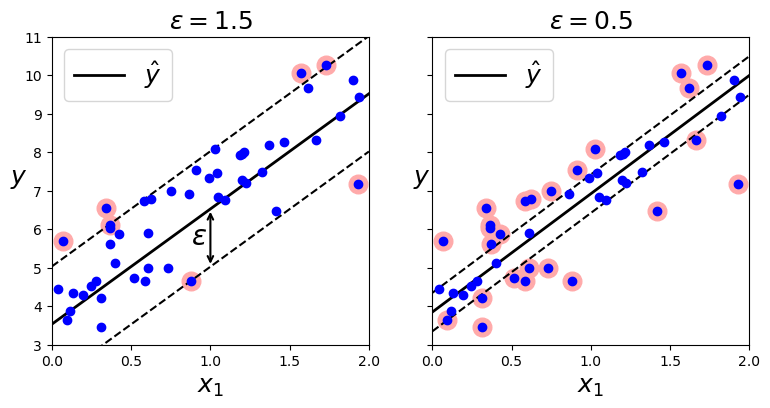

In [3]:

#### LINEAR SVR

def display_epsilon(epsilon):
    svm = LinearSVR(epsilon=epsilon, random_state=42, dual='auto')
    svm.fit(X, y)
    svm.support_ = find_support_vectors(svm, X, y)
    plot_svm_regression(epsilon, svm, X, y, [0, 2, 3, 11])

def find_support_vectors(svm, X, y):
    y_pred = svm.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm.epsilon)
    return np.argwhere(off_margin)

def plot_svm_regression(epsilon, svm, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm.predict(x1s)
    eps_x1 = 1
    eps_y_pred = svm.predict([[eps_x1]])
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm.epsilon, "k--")
    plt.plot(x1s, y_pred - svm.epsilon, "k--")
    plt.scatter(X[svm.support_], y[svm.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)
    plt.title(r"$\epsilon = {}$".format(svm.epsilon), fontsize=18)
    plt.ylabel(r"$y$", fontsize=18, rotation=0)
    if epsilon == 1.5:
        plt.annotate(
            '', xy=(eps_x1, eps_y_pred), xycoords='data',
            xytext=(eps_x1, eps_y_pred - svm.epsilon),
            textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
        )
        plt.text(0.88, 5.6, r"$\epsilon$", fontsize=20)
    

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
i = 0

for epsilon in [1.5, 0.5]:
    plt.sca(axes[i])
    display_epsilon(epsilon)
    i += 1

plt.show()


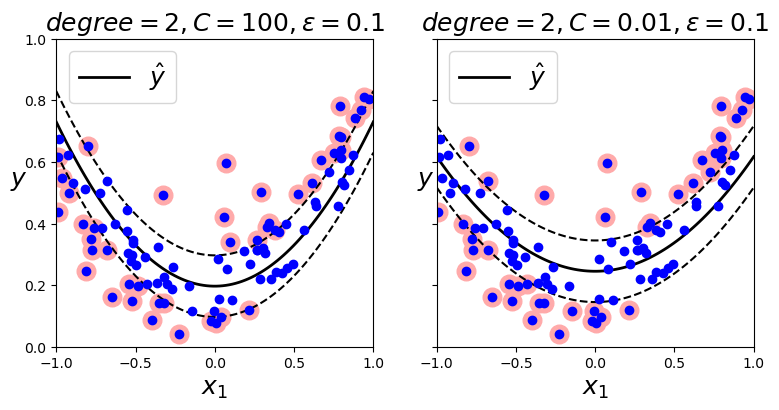

In [4]:

#### SVR WITH POLY KERNEL
from sklearn.svm import SVR

m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

def display_c(c):
    svm = SVR(kernel="poly", degree=2, C=c, epsilon=0.1, gamma="scale")
    svm.fit(X, y)
    plot_svm_regression(svm, X, y, [-1, 1, 0, 1])
    
def plot_svm_regression(svm, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm.epsilon, "k--")
    plt.plot(x1s, y_pred - svm.epsilon, "k--")
    plt.scatter(X[svm.support_], y[svm.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)
    plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm.degree, svm.C, svm.epsilon), fontsize=18)
    plt.ylabel(r"$y$", fontsize=18, rotation=0)
    
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
i = 0

for c in [100, 0.01]:
    plt.sca(axes[i])
    display_c(c)
    i += 1

plt.show()


In [5]:

#### ---- EXERCICES ---- ####

"""
Exercise 1: train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. 
See if you can get them to produce roughly the same model.
"""

from sklearn import datasets
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42, dual='auto')
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha, max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print()
print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)
print()



LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]



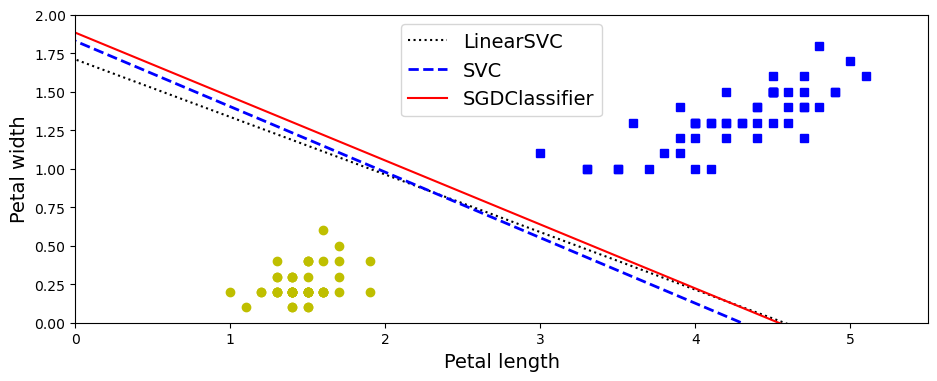

In [6]:

# compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()


In [7]:

"""
Exercice 2: train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. 
You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?
"""

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False, parser='auto')

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

#### TRAIN
lin_clf = LinearSVC(random_state=42, dual='auto')
lin_clf.fit(X_train, y_train)

#### EVALUATION
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)


0.9274833333333333

In [8]:

#### USE SCALER && GAMMA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)


0.9455333333333333

In [14]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

print()
print('Best estimator: ' + str(rnd_search_cv.best_estimator_))
print()
print('Best score: ' + str(rnd_search_cv.best_score_))
print()


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=1.4544638034145787, gamma=0.003646921197364209; total time=   0.3s
[CV] END ...C=1.4544638034145787, gamma=0.003646921197364209; total time=   0.3s
[CV] END ...C=1.4544638034145787, gamma=0.003646921197364209; total time=   0.3s
[CV] END ....C=10.504114840765588, gamma=0.06032920019762463; total time=   0.3s
[CV] END ....C=10.504114840765588, gamma=0.06032920019762463; total time=   0.3s
[CV] END ....C=10.504114840765588, gamma=0.06032920019762463; total time=   0.3s
[CV] END .....C=5.55656752785713, gamma=0.017388623155849384; total time=   0.3s
[CV] END .....C=5.55656752785713, gamma=0.017388623155849384; total time=   0.3s
[CV] END .....C=5.55656752785713, gamma=0.017388623155849384; total time=   0.3s
[CV] END ..C=3.7738118298113266, gamma=0.0023781668412074268; total time=   0.2s
[CV] END ..C=3.7738118298113266, gamma=0.0023781668412074268; total time=   0.2s
[CV] END ..C=3.7738118298113266, gamma=0.0023781

In [22]:

"""
Exercise 3: train an SVM regressor on the California housing dataset
"""

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()

X = housing["data"]
y = housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_svr = LinearSVR(random_state=42, dual='auto', max_iter=10000)
lin_svr.fit(X_train_scaled, y_train)

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)

print()
print('mse: ' + str(mse) + '\n')
print('rmse: ' + str(np.sqrt(mse)) + '\n')



mse: 0.9595484665813284

rmse: 0.979565447829459



In [23]:

#### USE SVR && RandomizedSearchCV

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

print()
print('Best estimator: ' + str(rnd_search_cv.best_estimator_))
print()


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=   7.1s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=   6.8s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643935; total time=   6.9s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=   6.6s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=   6.4s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779727; total time=   6.6s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   6.6s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   6.7s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   6.7s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=   6.4s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787434; total time=   6.5s
[CV] END ....C=1.5808361216819946, gamma=0.05399

In [28]:

#### EVALUATION

def eval_data(name_data, features, target):
    y_pred = rnd_search_cv.best_estimator_.predict(features)
    mse = mean_squared_error(target, y_pred)
    print('\nrmse ' + name_data + ': ' + str(np.sqrt(mse)) + '\n')
    
eval_data('scaled trained data', X_train_scaled, y_train)
eval_data('scaled test data', X_test_scaled, y_test)



rmse scaled trained data: 0.5727524770785376


rmse scaled test data: 0.5929168385528725

